In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

pd.options.display.max_columns = 1000      # set column display
pd.options.display.max_rows = 1000         # set row display
pd.options.mode.chained_assignment = None  # default='warn'

hexagons = gpd.read_file('../data/shapefiles/nyc/hexagons.geojson')
mappluto = gpd.read_file('../data/shapefiles/nyc/mappluto/MapPLUTO.shp')

mappluto = mappluto.to_crs(hexagons.crs) # ensure CRSes match

In [15]:
mappluto.head(2)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1000,02,1,10004,E007,1,15,8100,1,01,3B,1 GOVERNORS ISLAND,R3-2,None,None,None,None,None,GI,None,None,None,N,Y4,08,0,X,GOVERNORS ISLAND CORPORATION,7736692,2725731,2725731,0,0,0,0,0,0,2725731,2,134,0.0,0,0,0.0,0.0,0.0,0.0,N,0,N,5,0,104445450.0,176154300.0,176154300.0,1900,0,0,Governors Island Historic District,INDIVIDUAL LANDMARK,0.35,0.5,0.0,1.0,1,1.000010e+09,0,0005,979071,190225,16a,Y,199 999,10101,None,0.0,None,1,1,1,20v4,None,40.688799,-74.018675,None,0.0,7.550339e+06,"POLYGON ((298106.472 57494.494, 297968.021 574..."
1,MN,871,82,105,50,3001,02,2,10003,L003,13,14,5300,1,05,1B,34 UNION SQUARE,C6-4,C6-2A,None,None,None,None,US,None,None,None,Y,K2,05,0,None,"34 USE OWNER, LLC",3250,6500,6500,0,0,6500,0,0,0,0,2,1,2.0,0,1,26.0,125.0,26.0,125.0,N,2,N,3,2,724500.0,2346300.0,0.0,1953,1984,0,None,None,2.00,10.0,10.0,10.0,1,1.008710e+09,0,0050,987256,207324,12c,None,102 035,10307,None,0.0,None,1,None,None,20v4,None,40.735733,-73.989153,None,0.0,3.652481e+03,"POLYGON ((300901.329 63205.943, 300935.493 631..."


In [16]:
pluto_hexes_onetomany = gpd.sjoin(hexagons, mappluto, how="inner")

In [20]:
# pluto_hexes_onetomany = gpd.sjoin(hexagons, mappluto, how="inner")

keep_cols = ['hex_id_8', 'LotArea', 'ComArea', 'ResArea', 'OfficeArea',
             'RetailArea', 'FactryArea', 'NumBldgs', 'geometry']
pluto_hexes = pluto_hexes_onetomany[keep_cols].dissolve(by='hex_id_8',
                                                        aggfunc='sum')

In [25]:
pluto_hexes.head()

,geometry,LotArea,ComArea,ResArea,OfficeArea,RetailArea,FactryArea,NumBldgs
hex_id_8,,,,,,,,
882a100005fffff,"POLYGON ((317847.498 76722.030, 317308.379 766...",74923296,293161,55067,67758,12878,0,168
882a100007fffff,"POLYGON ((317141.941 76108.944, 317308.379 766...",4418897,191414,575012,29667,113766,5350,509
882a10000bfffff,"POLYGON ((319670.996 76199.205, 319837.502 766...",4855000,144908,25500,49786,0,0,19
882a10001dfffff,"POLYGON ((319131.891 76081.984, 319670.996 761...",5032085,144908,25500,49786,0,0,19
882a100021fffff,"POLYGON ((315484.726 77127.665, 316023.859 772...",90087500,275021,0,66208,1603,0,109


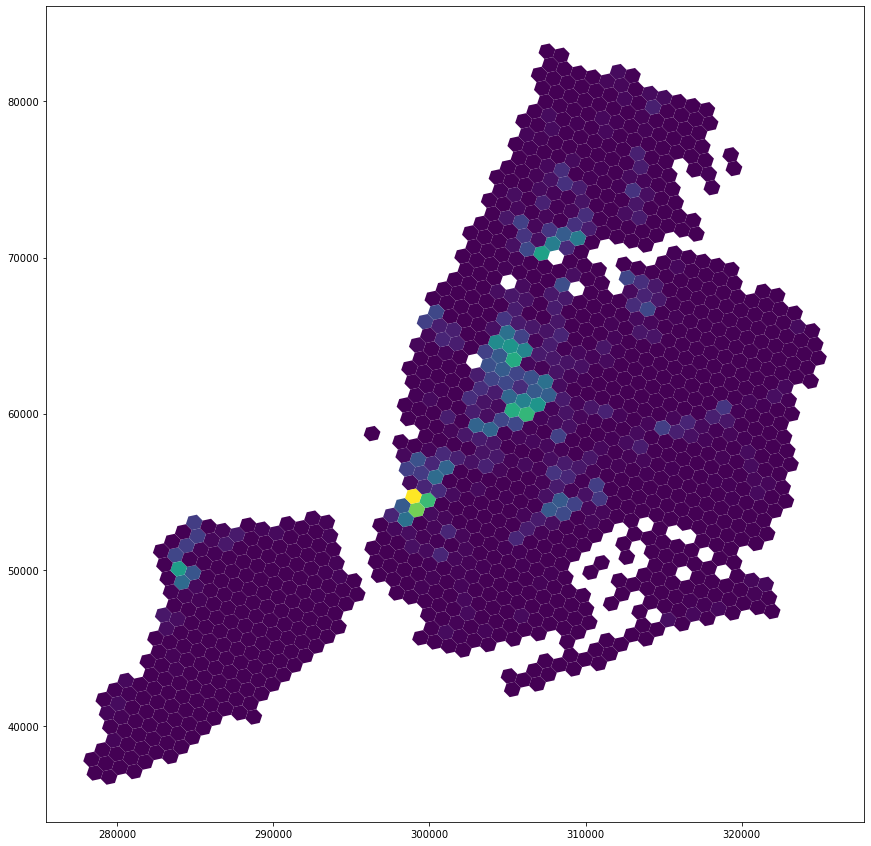

In [31]:
pluto_hexes.plot(figsize=(15,15),
                 column='FactryArea');

In [32]:
pluto_hexes.to_file("../data/shapefiles/nyc/pluto_hexbinned.geojson",
                    driver='GeoJSON')